<a href="https://colab.research.google.com/github/Nourjaweny/Line-Follower-Robot-C-/blob/main/knnForRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df=df.drop(df[df['workclass']=='?'].index)

In [ ]:
one_hot=pd.get_dummies(df['workclass'])
df=df.drop('workclass',axis=1)
df=df.join(one_hot)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46043 entries, 0 to 48841
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               46043 non-null  int64 
 1   fnlwgt            46043 non-null  int64 
 2   education         46043 non-null  object
 3   educational-num   46043 non-null  int64 
 4   marital-status    46043 non-null  object
 5   occupation        46043 non-null  object
 6   relationship      46043 non-null  object
 7   race              46043 non-null  object
 8   gender            46043 non-null  object
 9   capital-gain      46043 non-null  int64 
 10  capital-loss      46043 non-null  int64 
 11  hours-per-week    46043 non-null  int64 
 12  native-country    46043 non-null  object
 13  income            46043 non-null  object
 14  Federal-gov       46043 non-null  uint8 
 15  Local-gov         46043 non-null  uint8 
 16  Never-worked      46043 non-null  uint8 
 17  Private     

In [ ]:
one_hot=pd.get_dummies(df['marital-status'])
df=df.drop('marital-status',axis=1)
df=df.join(one_hot)

In [ ]:
one_hot=pd.get_dummies(df['relationship'])
df=df.drop('relationship',axis=1)
df=df.join(one_hot)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46043 entries, 0 to 48841
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    46043 non-null  int64 
 1   fnlwgt                 46043 non-null  int64 
 2   education              46043 non-null  object
 3   educational-num        46043 non-null  int64 
 4   occupation             46043 non-null  object
 5   race                   46043 non-null  object
 6   gender                 46043 non-null  object
 7   capital-gain           46043 non-null  int64 
 8   capital-loss           46043 non-null  int64 
 9   hours-per-week         46043 non-null  int64 
 10  native-country         46043 non-null  object
 11  income                 46043 non-null  object
 12  Federal-gov            46043 non-null  uint8 
 13  Local-gov              46043 non-null  uint8 
 14  Never-worked           46043 non-null  uint8 
 15  Private            

In [ ]:
one_hot=pd.get_dummies(df['race'])
df=df.drop('race',axis=1)
df=df.join(one_hot)

In [ ]:
one_hot=pd.get_dummies(df['gender'])
df=df.drop('gender',axis=1)
df=df.join(one_hot)

In [ ]:
df=df.drop(df[df['occupation']== '?'].index)

In [ ]:
E=LabelEncoder()
df['occupation']=E.fit_transform(df['occupation'])

In [ ]:
E=LabelEncoder()
df['education']=E.fit_transform(df['education'])

In [ ]:
E=LabelEncoder()
df['native-country']=E.fit_transform(df['native-country'])

In [ ]:
df.head()

,age,fnlwgt,education,educational-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,income,...,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,25,226802,1,7,6,0,0,40,39,<=50K,...,1,0,0,0,0,1,0,0,0,1
1,38,89814,11,9,4,0,0,50,39,<=50K,...,0,0,0,0,0,0,0,1,0,1
2,28,336951,7,12,10,0,0,40,39,>50K,...,0,0,0,0,0,0,0,1,0,1
3,44,160323,15,10,6,7688,0,40,39,>50K,...,0,0,0,0,0,1,0,0,0,1
5,34,198693,0,6,7,0,0,30,39,<=50K,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
x=df[['education','age','fnlwgt','educational-num','occupation','capital-gain','capital-loss','hours-per-week','native-country','Own-child','Unmarried','Wife','Asian-Pac-Islander','Black','Other','White','Female','Male']]
y=df['income']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.7245633851768182


In [ ]:
n=5
scores=[]
for k in range(1,5):
  knn=KNeighborsClassifier(k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  print("accuracy for k=",k,"is",round(accuracy_score(y_pred,y_test),2))
  scores.append(round(accuracy_score(y_pred,y_test),2))
print(scores)

accuracy for k= 1 is 0.72
accuracy for k= 2 is 0.78
accuracy for k= 3 is 0.75
accuracy for k= 4 is 0.78
[0.72, 0.78, 0.75, 0.78]


Text(0, 0.5, 'testing accuracy')

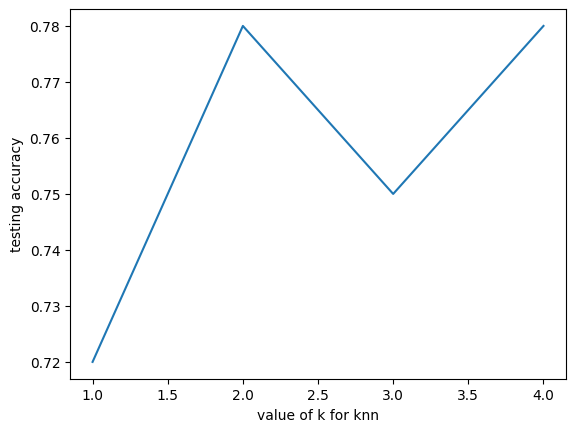

In [ ]:
plt.plot(range(1,5),scores)
plt.xlabel('value of k for knn')
plt.ylabel('testing accuracy')

In [ ]:
#KNN needs homogeneous features because features must have the same scale.

In [ ]:
x=np.array([1,7,25,226802,7,6,0,0,40,39,1,0,0,0,0,1,0,0,0,1])
x=x.reshape(-1,1)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
ypred = knn.predict(x)